# Data Handling
When working with large amounts of data, we always should expect there to be some missing data or errors. We first have to detect the errors and can then either remove or impute the faulty values. Most of the time there is no obvious right or wrong as it depends on the data and case. Handling the data is the true art of data science.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Filtering

In [ ]:
# create df with NaN, inf, ? strings, ...
df = pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [1, 2, np.inf],
    'Column C': ["?", 2, 5],
    'Column D': [np.nan, 6, 9]
})

df

In [ ]:
# test elements for NaN values
pd.isnull(df)

In [ ]:
# drop rows with NaN values
df.dropna()

In [ ]:
# only consider one column 
df.dropna(subset=['Column A']) 

In [ ]:
# drop columns with NaN values
df.dropna(axis=1) 

A blank entry in a dataset often simply means a 0, but when imported pandas turns it into a NaN value, we can replace these values with different methods

In [ ]:
df.fillna(0)

In [ ]:
# replace inf values
df.replace([np.inf, -np.inf], 0)

In [ ]:
# check if there are NaN values in a column
df.isnull().any()

In [ ]:
# locate NaN values in column
df.loc[df["Column A"].isnull()].index

In [ ]:
# check data types of columns
df.dtypes

In [ ]:
# replace ? string with 0
df['Column C'].replace('?', 0, inplace= True)
df.dtypes

## Handle invalid data

In [ ]:
# data frame with survey data
df = pd.DataFrame({
    'ID': ['1110','1110','1111','1112','1113','1114'],
    'Name': ['Thomas','Thomas','Sarah','Ella','Barbara','Daniel'],
    'Sex': ['M','M', 'F', 'F', 'D', '?'],
    'Age': [29,29, 30, 290, 24, 25],
})
df

In [ ]:
# we have duplicates in the df, the ID signals that all entries should be unique
df.duplicated()

In [ ]:
# we can drop all duplicates and only keep the first/last entry
df.drop_duplicates(keep='first',inplace=True)
df

In [ ]:
# show all unique entries
df['Sex'].unique()

In [ ]:
# we could assume that D was a typo for F and replace all D entries with F
df['Sex'].replace('D', 'F',inplace=True)
df

In [ ]:
# there is an invalid age entry of 290
print('Max Age is', max(df['Age']))
print('Min Age is',min(df["Age"]))

In [ ]:
# we could also assume that 290 was a typo for 29, but to make sure we can
# exclude all implausible values
df = df[df['Age'] <= 110]
df

In [ ]:
# we also do not know what to make of the '?'
# - we could imply the Sex by the Name (not possible with large amount of '?')
# - we could use the '?' as its own Sex category
# - we could just filter them out
df = df[df['Sex'] != '?']
df

## Filling missing values

In [10]:
# dataframe with a specific order and a missing value
df = pd.DataFrame({
    'Hour': ['09:00','11:00','07:00','12:00','08:00','06:00','10:00'],
    'Precipitation': [112,np.nan,78, 84, 92,70,105 ]
})

In [ ]:
# order df by Hour
df.sort_values('Hour',inplace=True)
df.reset_index(drop=True,inplace=True)
df

we can see that the Precipitation follows some sort of trend. And we have a time series with a range of hourly values. Simply dropping the value would make the Hour column inconsistent, thus we try to avoid it. We should try to impute the missing value using the trend instead.

There are of course different methods to interpolate...

In [ ]:
# use simple filling method (forward fill/...)
df.fillna(method='ffill')

In [ ]:
# linear interpolation
df['Precipitation'].interpolate(method="linear")

In [ ]:
# polynomial interpolation
df['Precipitation'].interpolate(method="polynomial", order=2)

# Formatting
Cleaning text values can be incredibly hard. Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases.

In [ ]:
# Survey data formatted as strings only
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})
df

In [ ]:
# we see some separation with an underscore and can use that pattern to split the text
df = df['Data'].str.split('_',expand=True)
df

In [14]:
# label the columns
df.columns = ['Year', 'Sex', 'Country', 'Num Children']

In [ ]:
# we need to remove whitespaces in some country values and ? in year values
df['Country'] = df['Country'].str.replace(' ', '')
df['Year'] = df['Year'].str.replace('?', '')
df

# Data Handling Exercise
We have some price data with missing and faulty values that we want to analyze.
## Exercise a)
- Read in the data *btc-eth.csv*.
- Visualize and inspect the price data
- Fill missing values

In [19]:
# read in data, don't forget to use datatime


In [ ]:
# visualize data to inspect (Tip: use format 16:9)


In [20]:
# locate missing values


DatetimeIndex(['2017-12-08', '2017-12-09', '2017-12-10'], dtype='datetime64[ns]', name='Timestamp', freq=None)

In [21]:
# lets look at the times where values are missing


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [260]:
# linear interpolation


In [261]:
# lets view the fitted values


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.480
2017-12-07,16501.971667,421.150
2017-12-08,16007.436667,444.185
2017-12-09,15142.834152,467.220
2017-12-10,14869.805000,490.255
2017-12-11,16762.116667,513.290
2017-12-12,17276.393333,656.520


## Exercise b)
We can clearly see some jumps/outliers that look implausible and are most likely errors. They will strongly disturb any analysis that we do. It is fairly easy to spot them in the plot and remove them manually, but we want to construct an automated approach.

- Create an approach that automatically determines outliers (i.e. z-score)
- Replace the outliers
- Plot the final cleaned price series

In [24]:
# define upper and lower limit based on a z-score of 3


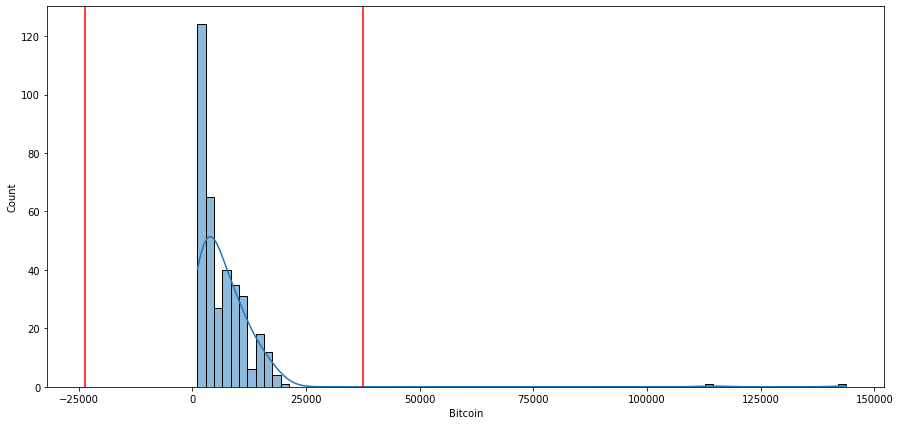

In [25]:
# inspect the ranges to see if the limits are properly set to determine outliers only


In [26]:
# create copy
df_clean = df.copy()

# remove outliers in clean_df


In [27]:
# interpolate missing values


<AxesSubplot:xlabel='Timestamp'>

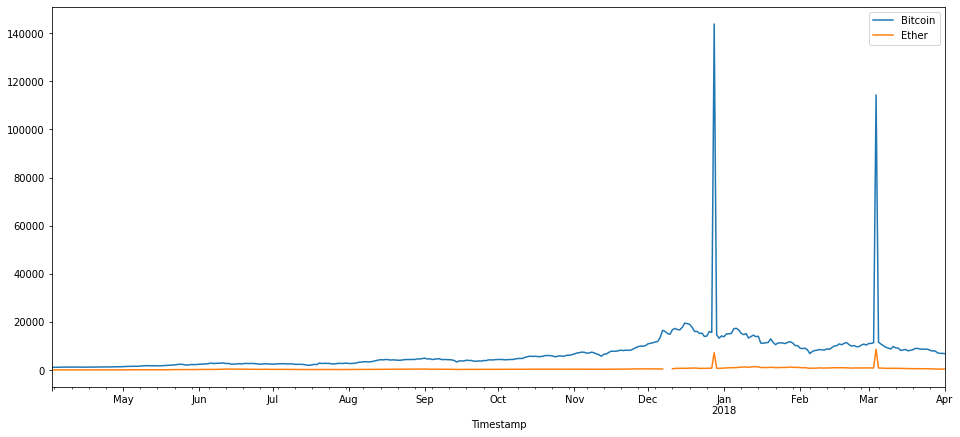

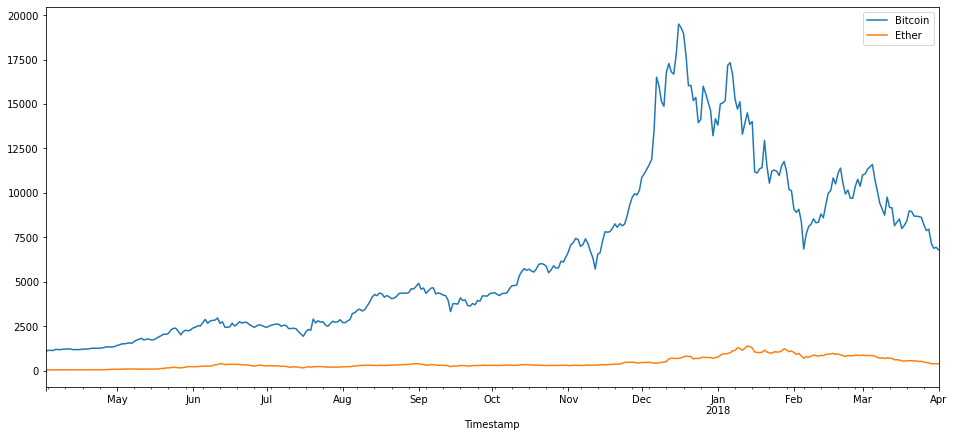

In [28]:
# inspect your results
